In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Step 2: Load Dataset
df = pd.read_csv('/content/medical_insurance_dataset.csv')




In [ ]:
df.head()  # Display first 5 rows

,age,sex,BMI,children,smoker,region,charges,employee_salary
0,43,male,33.1,0,no,southwest,41976.39,55527.21
1,31,male,27.6,1,no,southwest,38555.00,42360.74
2,34,female,34.6,4,no,northeast,16315.52,89500.26
3,18,female,38.8,3,no,northeast,49838.44,118399.19
4,38,male,39.6,5,yes,northwest,42724.29,51085.96


In [ ]:
#check bottom rows
df.tail()

,age,sex,BMI,children,smoker,region,charges,employee_salary
95,43,female,31.7,4,yes,northeast,2174.43,98210.94
96,61,female,24.0,1,no,northwest,5927.74,88746.77
97,19,male,25.0,2,no,northeast,22144.71,79444.75
98,54,female,26.5,5,no,southeast,15948.42,53913.02
99,38,male,30.3,2,yes,northwest,36204.59,108424.44


In [ ]:
# Step 3: View dataset shape (rows & columns)
df.shape


(100, 8)

In [ ]:
# View column names
print("Column Names:", df.columns.tolist())

Column Names: ['age', 'sex', 'BMI', 'children', 'smoker', 'region', 'charges', 'employee_salary']


In [ ]:
# View dataset info (data types, missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              100 non-null    int64  
 1   sex              100 non-null    object 
 2   BMI              100 non-null    float64
 3   children         100 non-null    int64  
 4   smoker           100 non-null    object 
 5   region           100 non-null    object 
 6   charges          100 non-null    float64
 7   employee_salary  100 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 6.4+ KB


In [ ]:
df.describe()

,age,BMI,children,charges,employee_salary
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,42.630000,28.040000,2.420000,25333.190800,77461.490100
std,13.135391,6.376108,1.694793,13922.135003,23919.460251
min,18.000000,18.600000,0.000000,2095.880000,30101.950000
25%,33.000000,22.400000,1.000000,14060.270000,54053.097500
50%,43.000000,27.500000,2.000000,26253.265000,79958.605000
75%,52.000000,33.175000,4.000000,36402.412500,98385.727500
max,65.000000,39.600000,5.000000,49838.440000,118399.190000


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['age', 'sex', 'BMI', 'children', 'smoker', 'region', 'charges',
       'employee_salary'],
      dtype='object')

In [ ]:
# Step 4: Check for missing values
print("Missing Values in Dataset:\n", df.isnull().sum())


Missing Values in Dataset:
 age                0
sex                0
BMI                0
children           0
smoker             0
region             0
charges            0
employee_salary    0
dtype: int64


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
BMI,0
children,0
smoker,0
region,0
charges,0
employee_salary,0


In [ ]:
# Encode Categorical Variables
label_encoders = {}
for col in ['sex', 'smoker']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le




In [ ]:
# One-Hot Encoding for 'region'
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,age,sex,BMI,children,smoker,charges,employee_salary,region_northwest,region_southeast,region_southwest
0,43,1,33.1,0,0,41976.39,55527.21,False,False,True
1,31,1,27.6,1,0,38555.00,42360.74,False,False,True
2,34,0,34.6,4,0,16315.52,89500.26,False,False,False
3,18,0,38.8,3,0,49838.44,118399.19,False,False,False
4,38,1,39.6,5,1,42724.29,51085.96,True,False,False


In [ ]:
# Step 5: Check correlations between features
correlation_matrix = df.corr()

# Display correlation matrix
print("Feature Correlations:\n", correlation_matrix)



Feature Correlations:
                        age       sex       BMI  children    smoker   charges  \
age               1.000000  0.027935 -0.032843  0.034729 -0.057658 -0.184965   
sex               0.027935  1.000000  0.190943 -0.318585 -0.057750  0.069986   
BMI              -0.032843  0.190943  1.000000  0.145371  0.108389  0.131636   
children          0.034729 -0.318585  0.145371  1.000000  0.074379 -0.022887   
smoker           -0.057658 -0.057750  0.108389  0.074379  1.000000  0.078203   
charges          -0.184965  0.069986  0.131636 -0.022887  0.078203  1.000000   
employee_salary  -0.041029  0.005571 -0.078471 -0.182720 -0.119178 -0.038297   
region_northwest  0.029624 -0.094353 -0.069814 -0.055617  0.153969  0.110699   
region_southeast -0.034486  0.043282 -0.068808 -0.084686  0.013990 -0.104712   
region_southwest  0.103686  0.104828  0.130364  0.031058 -0.179262  0.054683   

                  employee_salary  region_northwest  region_southeast  \
age                    

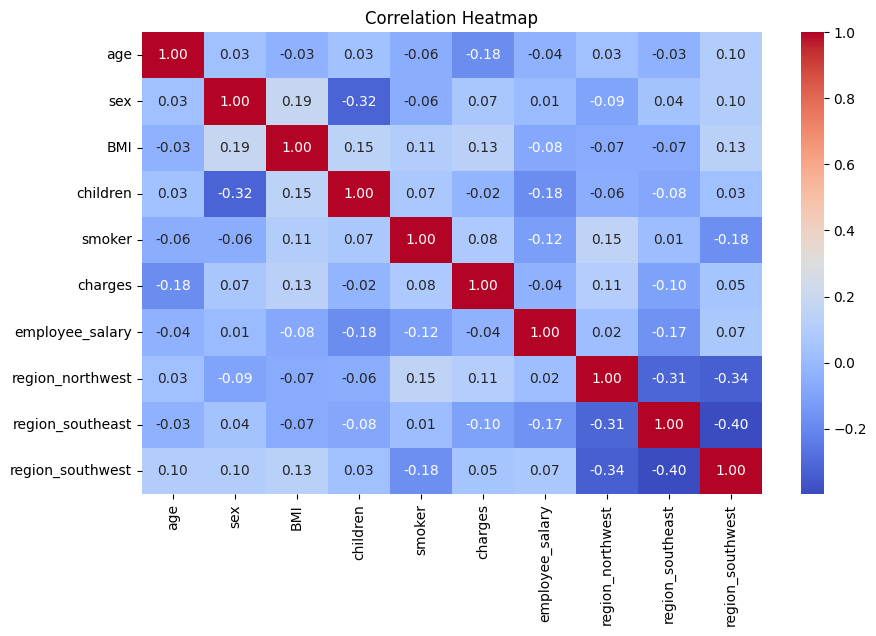

In [ ]:
# Visualize correlation using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


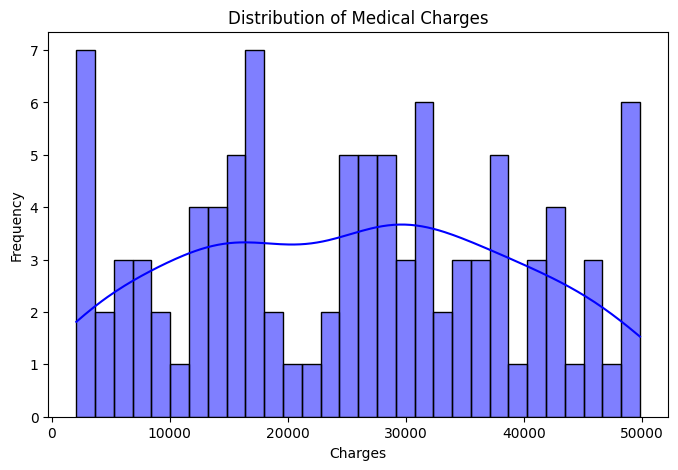

In [ ]:
#distribution of charges
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=30, kde=True, color='blue')
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


<ipython-input-11-4b6a2b708e1c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['smoker'], y=df['charges'], palette=['blue', 'red'])


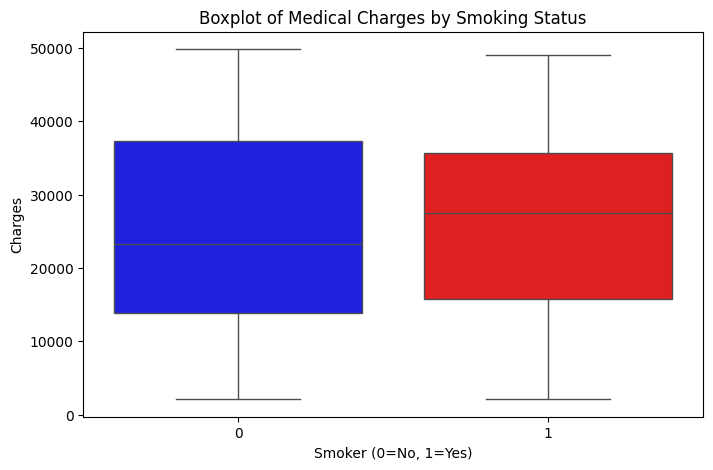

In [ ]:
#box plot of charges by smoker status
plt.figure(figsize=(8,5))
sns.boxplot(x=df['smoker'], y=df['charges'], palette=['blue', 'red'])
plt.title('Boxplot of Medical Charges by Smoking Status')
plt.xlabel('Smoker (0=No, 1=Yes)')
plt.ylabel('Charges')
plt.show()


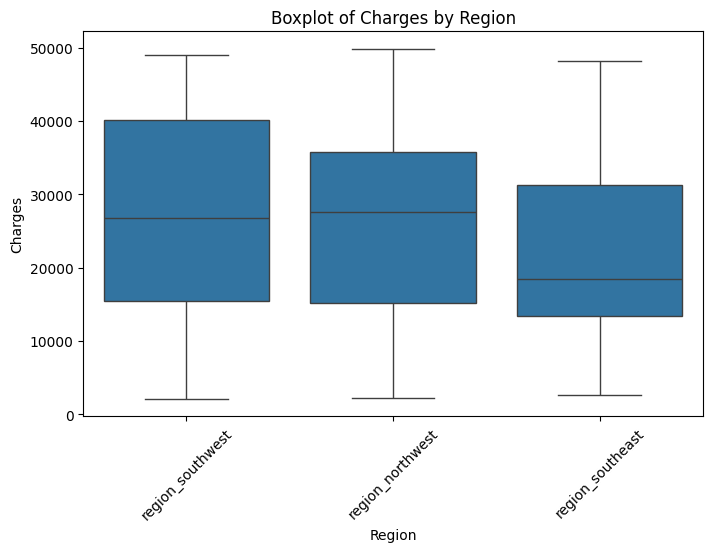

In [ ]:
#box plot of charges by region
plt.figure(figsize=(8,5))
sns.boxplot(x=df[['region_northwest', 'region_southeast', 'region_southwest']].idxmax(axis=1),
            y=df['charges'])
plt.title('Boxplot of Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.xticks(rotation=45)
plt.show()


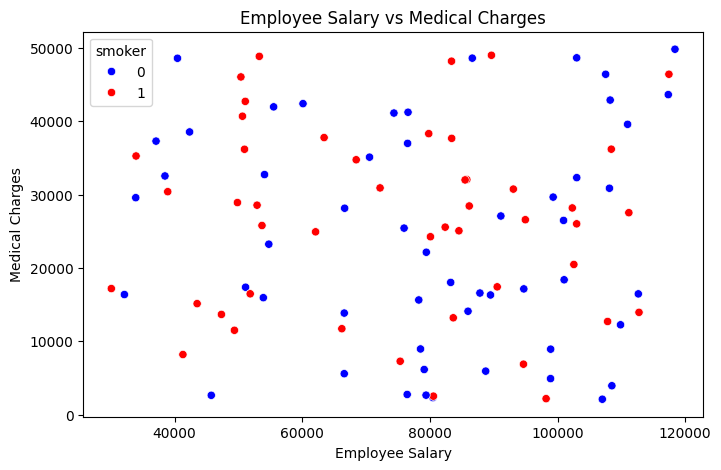

In [ ]:
#scatter plot: employee salary vs medical charges
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['employee_salary'], y=df['charges'], hue=df['smoker'], palette=['blue', 'red'])
plt.title('Employee Salary vs Medical Charges')
plt.xlabel('Employee Salary')
plt.ylabel('Medical Charges')
plt.show()


In [ ]:
# Step 8: Split Data
X = df.drop(columns=['charges'])  # Features
y = df['charges']  # Target Variable




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 9: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#linear regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
MAE: 11829.506237584048
MSE: 199516102.81716585
R2 Score: -0.26050134342140185


In [ ]:
#random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regressor:
MAE: 11448.845280000003
MSE: 173698146.61441967
R2 Score: -0.09738885265779174


In [ ]:
#support vector regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

print("Support Vector Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R2 Score:", r2_score(y_test, y_pred_svr))


Support Vector Regressor:
MAE: 10878.03915440415
MSE: 161732999.98213664
R2 Score: -0.02179553867827866


In [ ]:
#decision tree regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree Regressor:
MAE: 15633.641499999998
MSE: 345901947.636145
R2 Score: -1.1853367398971018


In [ ]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
mae = [mean_absolute_error(y_test, y_pred_lr),
       mean_absolute_error(y_test, y_pred_dt),
       mean_absolute_error(y_test, y_pred_rf),
       mean_absolute_error(y_test, y_pred_svr)]
r2 = [r2_score(y_test, y_pred_lr),
      r2_score(y_test, y_pred_dt),
      r2_score(y_test, y_pred_rf),
      r2_score(y_test, y_pred_svr)]

comparison_df = pd.DataFrame({'Model': models, 'MAE': mae, 'R2 Score': r2})
print(comparison_df)


               Model           MAE  R2 Score
0  Linear Regression  11829.506238 -0.260501
1      Decision Tree  15633.641500 -1.185337
2      Random Forest  11448.845280 -0.097389
3                SVR  10878.039154 -0.021796


In [ ]:
#Check feature correlations with target
correlation = df.corr()['charges'].sort_values(ascending=False)
print(correlation)


charges             1.000000
BMI                 0.131636
region_northwest    0.110699
smoker              0.078203
sex                 0.069986
region_southwest    0.054683
children           -0.022887
employee_salary    -0.038297
region_southeast   -0.104712
age                -0.184965
Name: charges, dtype: float64


In [ ]:
#Log transformation to reduce skewness
df['log_charges'] = np.log(df['charges'])


In [ ]:
# Step 3: Remove outliers using Interquartile Range (IQR)
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out extreme values
df = df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)]
print("Dataset size after removing outliers:", df.shape)


Dataset size after removing outliers: (100, 11)


In [ ]:
#Standardize features (important for SVR, ANN, etc.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Compute Mutual Information scores
mi_scores = mutual_info_regression(X_train_scaled, y_train)

# Convert to DataFrame for better readability
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

print(mi_df)


            Feature  MI Score
0               age  0.159307
3          children  0.035529
5   employee_salary  0.025331
7  region_southeast  0.010745
1               sex  0.000000
2               BMI  0.000000
4            smoker  0.000000
6  region_northwest  0.000000
8  region_southwest  0.000000


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top 5 features
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['age', 'BMI', 'employee_salary', 'region_northwest',
       'region_southeast'],
      dtype='object')


In [ ]:
# Retrain models with only selected features
lr_model.fit(X_train_selected, y_train)
rf_model.fit(X_train_selected, y_train)
dt_model.fit(X_train_scaled, y_train)
svr_model.fit(X_train_scaled, y_train)


SVR()